In [8]:
!pip install seaborn


In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_training_curves(history, fold):
    fsave = f'training_curves_fold_{fold}.png'
    # tsave = os.path.join(SAVE_PATH, fsave)

    # Use a clear and readable style
    plt.style.use('seaborn')  # Updated to use available style
    sns.set_palette("colorblind")

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    
    metrics = [
        ("Loss", 'train_loss', 'val_loss'),
        ("Accuracy", 'train_acc', 'val_acc'),
        ("Learning Rate", 'learning_rates', None),
        ("Precision", 'train_precision', 'val_precision'),
        ("Recall", 'train_recall', 'val_recall'),
        ("F1 Score", 'train_f1', 'val_f1')
    ]
    
    for i, (title, train_key, val_key) in enumerate(metrics):
        ax = axs[i // 3, i % 3]
        ax.plot(history[train_key], label="Train", marker='o', linestyle='-', linewidth=2)

        if val_key:
            ax.plot(history[val_key], label="Validation", marker='s', linestyle='--', linewidth=2)

        ax.set_title(title, fontsize=16, fontweight='bold')
        ax.set_xlabel('Epoch', fontsize=14)
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True, linestyle="--", alpha=0.6)
        ax.legend(fontsize=12, loc='best')

        if title == "Learning Rate":
            ax.set_yscale('log')

    plt.tight_layout()
    # plt.savefig(tsave, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


In [21]:
import os
import matplotlib.pyplot as plt

def plot_training_curves(history, fold, save_path="."):
    """Plot and save standard training curves including loss, accuracy, learning rate, precision, recall, and F1-score.

    Args:
        history (dict): Dictionary containing lists of training metrics per epoch.
        fold (int): Fold number (for cross-validation, if applicable).
        save_path (str): Directory to save the plot image.
    """
    fsave = f'training_curves_fold_{fold}.png'
    tsave = os.path.join(save_path, fsave)

    # Use a better style
    plt.style.use('seaborn-v0_8-darkgrid')

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # Loss curves
    axs[0, 0].plot(history['train_loss'], label='Train Loss', linestyle='-', color='tab:blue')
    axs[0, 0].plot(history['val_loss'], label='Validation Loss', linestyle='--', color='tab:orange')
    axs[0, 0].set_title('Loss')
    axs[0, 0].legend()

    # Accuracy curves
    axs[0, 1].plot(history['train_acc'], label='Train Accuracy', linestyle='-', color='tab:blue')
    axs[0, 1].plot(history['val_acc'], label='Validation Accuracy', linestyle='--', color='tab:orange')
    axs[0, 1].set_title('Accuracy')
    axs[0, 1].legend()

    # Learning rate
    axs[0, 2].plot(history['learning_rates'], label='Learning Rate', linestyle='-', color='tab:green')
    axs[0, 2].set_title('Learning Rate')
    axs[0, 2].set_yscale('log')
    axs[0, 2].legend()

    # Precision
    axs[1, 0].plot(history['train_precision'], label='Train Precision', linestyle='-', color='tab:blue')
    axs[1, 0].plot(history['val_precision'], label='Validation Precision', linestyle='--', color='tab:orange')
    axs[1, 0].set_title('Precision')
    axs[1, 0].legend()

    # Recall
    axs[1, 1].plot(history['train_recall'], label='Train Recall', linestyle='-', color='tab:blue')
    axs[1, 1].plot(history['val_recall'], label='Validation Recall', linestyle='--', color='tab:orange')
    axs[1, 1].set_title('Recall')
    axs[1, 1].legend()

    # F1 Score
    axs[1, 2].plot(history['train_f1'], label='Train F1', linestyle='-', color='tab:blue')
    axs[1, 2].plot(history['val_f1'], label='Validation F1', linestyle='--', color='tab:orange')
    axs[1, 2].set_title('F1 Score')
    axs[1, 2].legend()

    for ax in axs.flat:
        ax.set_xlabel('Epoch')
        ax.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.savefig(tsave, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()


In [17]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


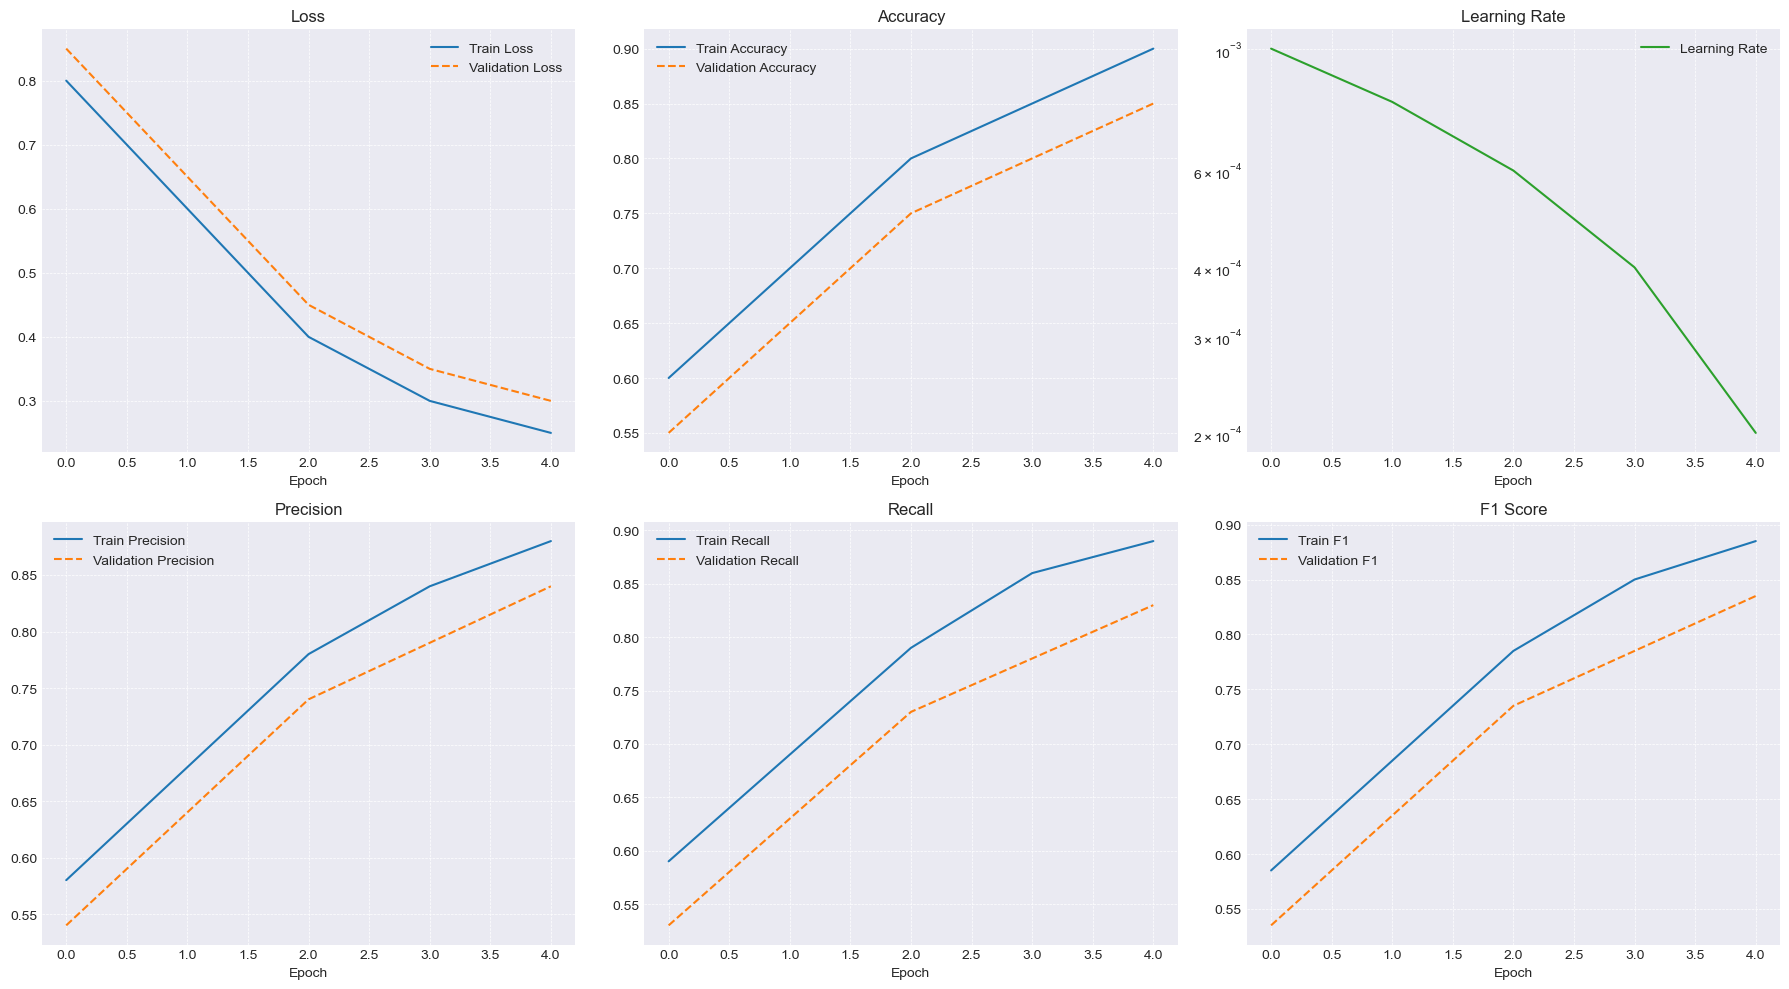

In [18]:
# Create dummy training history dictionary
dummy_history = {
    'train_loss': [0.8, 0.6, 0.4, 0.3, 0.25],
    'val_loss': [0.85, 0.65, 0.45, 0.35, 0.3],
    'train_acc': [0.6, 0.7, 0.8, 0.85, 0.9],
    'val_acc': [0.55, 0.65, 0.75, 0.8, 0.85],
    'learning_rates': [0.001, 0.0008, 0.0006, 0.0004, 0.0002],
    'train_precision': [0.58, 0.68, 0.78, 0.84, 0.88],
    'val_precision': [0.54, 0.64, 0.74, 0.79, 0.84],
    'train_recall': [0.59, 0.69, 0.79, 0.86, 0.89],
    'val_recall': [0.53, 0.63, 0.73, 0.78, 0.83],
    'train_f1': [0.585, 0.685, 0.785, 0.85, 0.885],
    'val_f1': [0.535, 0.635, 0.735, 0.785, 0.835]
}

# Test the plotting function with dummy data
plot_training_curves(dummy_history, fold=1)


In [1]:
%load_ext tensorboard
# %tensorboard --logdir=C:\Users\aagab\codes\Human_pose\plotter\RESNET_18_E15_UNFREEZE\kaggle\working\BS32_KAGGLE_CROSS_FOLD_2D_CNN_LSTM_2025-02-23_LR0.001_LHS512_LL1_CTresnet18\tensorboard_logs

ModuleNotFoundError: No module named 'tensorboard'

In [4]:
FOLD_CHECKPOINT_PATH = r"C:\Users\aagab\codes\Human_pose\plotter\RESNET_18_E15_UNFREEZE\kaggle\working\FOLD_CHECKPOINT"

In [12]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F
import torch.nn.utils.rnn as rnn_utils

class AttentionLayer(nn.Module):
    """Basic attention mechanism for sequence processing"""
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.W = nn.Linear(input_size, hidden_size)
        self.V = nn.Linear(hidden_size, 1)

    def forward(self, lstm_output, mask=None):
        att_scores = self.V(torch.tanh(self.W(lstm_output))).squeeze(-1)

        if mask is not None:
            att_scores = att_scores.masked_fill(mask == 0, -1e9)

        att_weights = F.softmax(att_scores, dim=1)
        context = (lstm_output * att_weights.unsqueeze(-1)).sum(1)
        return context, att_weights

class CNNLSTM(nn.Module):
    """Modular video action classifier with various configuration options"""
    def __init__(self, num_classes,
                 lstm_hidden_size=512,
                 lstm_layers=1,
                 dropout=0.5,
                 freeze_cnn=True,
                 use_attention=False,
                 cnn_model='resnet18'):

        super().__init__()
        self.use_attention = use_attention
        self.cnn_model = cnn_model

        # CNN Feature Extractor
        self.cnn, self.cnn_feature_size = self._build_cnn(cnn_model)
        self._set_cnn_freeze(freeze_cnn)

        # Adjust LSTM input size based on CNN feature size
        lstm_input_size = self.cnn_feature_size

        # Sequence Processing
        self.lstm = nn.LSTM(
            input_size=lstm_input_size,
            hidden_size=lstm_hidden_size,
            num_layers=lstm_layers,
            batch_first=True,
            dropout=dropout if lstm_layers > 1 else 0
        )

        # Attention Mechanism
        if self.use_attention:
            self.attention = AttentionLayer(
                input_size=lstm_hidden_size,
                hidden_size=lstm_hidden_size
            )

        # Classification Head
        self.classifier = self._build_classifier(
            lstm_hidden_size,
            num_classes,
            dropout
        )

        # Initialize weights
        self._initialize_weights()

    def _build_cnn(self, model_name):
        """Initialize CNN feature extractor with proper feature sizes"""
        if model_name == 'resnet18':
            cnn = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
            return nn.Sequential(*list(cnn.children())[:-2]), 512  # Remove avgpool and fc
        elif model_name == 'mobilenet_v3':
            cnn = models.mobilenet_v3_small(weights=models.MobileNet_V3_Small_Weights.DEFAULT)
            # Remove classifier and avgpool layers
            return nn.Sequential(*list(cnn.children())[:-2]), 576  # Feature size for mobilenet_v3_small
        else:
            raise ValueError(f"Unsupported CNN model: {model_name}")

    def _build_classifier(self, input_size, num_classes, dropout):
        """Build modular classification head"""
        return nn.Sequential(
            nn.Linear(input_size, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(dropout/2),

            nn.Linear(128, num_classes)
        )

    def _initialize_weights(self):
        """Initialize weights for classification layers"""
        for m in self.classifier.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _set_cnn_freeze(self, freeze):
        """Freeze/unfreeze CNN parameters"""
        for param in self.cnn.parameters():
            param.requires_grad = not freeze

    def forward(self, x, lengths):
        # Process frames through CNN
        batch_size, seq_len = x.size(0), x.size(1)
        x = x.view(batch_size*seq_len, *x.size()[2:])
        x = self.cnn(x)
        
        # Adaptive pooling to handle different feature sizes
        if self.cnn_model == 'mobilenet_v3':
            x = F.adaptive_avg_pool2d(x, (1, 1))  # For 576 features
        else:
            x = F.adaptive_avg_pool2d(x, (1, 1))  # For 512 features
            
        x = x.view(batch_size, seq_len, -1)

        # Process sequence through LSTM
        packed_x = rnn_utils.pack_padded_sequence(
            x, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        packed_out, _ = self.lstm(packed_x)
        lstm_out, _ = rnn_utils.pad_packed_sequence(packed_out, batch_first=True)

        # Get final representation
        if self.use_attention:
            mask = self._create_attention_mask(lstm_out.size(1), lengths)
            context, _ = self.attention(lstm_out, mask)
        else:
            # Get last valid time step output
            context = lstm_out[torch.arange(batch_size), lengths-1, :]

        return self.classifier(context)

    def _create_attention_mask(self, max_len, lengths):
        """Create attention mask from sequence lengths"""
        device = lengths.device
        return torch.arange(max_len, device=device).expand(len(lengths), max_len) < lengths.unsqueeze(1)

    def unfreeze_cnn_layers(self, num_layers=3, start_from_end=True):
        """Gradually unfreeze CNN layers for fine-tuning"""
        conv_layers = [m for m in self.cnn.modules() if isinstance(m, nn.Conv2d)]
        num_total = len(conv_layers)

        if start_from_end:
            layers_to_unfreeze = conv_layers[-num_layers:]
        else:
            layers_to_unfreeze = conv_layers[:num_layers]

        for layer in layers_to_unfreeze:
            for param in layer.parameters():
                param.requires_grad = True

    def count_parameters(self):
        total_params = 0
        for name, parameter in self.named_parameters():
            if parameter.requires_grad:
                params = parameter.numel()
                print(f"{name}: {params}")
                total_params += params
        print(f"Total Trainable Params: {total_params}")

In [13]:
def compute_average_history(histories):
    """
    Compute the average history across multiple folds.

    Args:
        histories (list of dict): List of history dictionaries from all folds. Each dictionary contains
                                  metrics like 'train_loss', 'val_loss', 'train_accuracy', etc., as lists.

    Returns:
        dict: Averaged history containing the same keys as the input histories.
    """
    avg_history = {}
    num_folds = len(histories)

    for key in histories[0]:  # Iterate over metric names
        # Initialize a list for each metric
        avg_history[key] = [0.0] * len(histories[0][key])  # Assume all folds have same length histories

        # Sum across all folds
        for fold_history in histories:
            for i, value in enumerate(fold_history[key]):
                avg_history[key][i] += value

        # Divide by the number of folds to compute the average
        avg_history[key] = [val / num_folds for val in avg_history[key]]

    return avg_history

In [14]:
num_classes = 13
lstm_hidden_size = 512
lstm_layers = 1
DROPOUT = 0.5
CNN_TYPE = 'resnet18'
model = CNNLSTM(num_classes=num_classes, lstm_hidden_size=lstm_hidden_size, lstm_layers=lstm_layers, dropout=DROPOUT, cnn_model=CNN_TYPE)

In [15]:
FOLD_CHECKPOINT_PATH = r"C:\Users\aagab\codes\Human_pose\plotter\RESNET_18_E15_UNFREEZE\kaggle\working\FOLD_CHECKPOINT"

In [18]:
import torch
import os
folds = 5
for fold in range(folds):
        # Check if checkpoint exists for this fold
        checkpoint_path = os.path.join(FOLD_CHECKPOINT_PATH, f'fold_{fold}_checkpoint.pth')
        if os.path.exists(checkpoint_path):
            print(f"Loading checkpoint for fold {fold + 1}")
            checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
            # model = checkpoint['model']
            # optimizer = checkpoint['optimizer']
            # history = checkpoint['history']
            all_metrics = checkpoint['all_metrics']
            # best_model = checkpoint['best_model']
            # best_val_loss = checkpoint['best_val_loss']
            # best_fold = checkpoint['best_fold']
            continue
all_metrics       

Loading checkpoint for fold 1
Loading checkpoint for fold 2
Loading checkpoint for fold 3
Loading checkpoint for fold 4


C:\Users\aagab\AppData\Local\Temp\ipykernel_2360\703615605.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.de

Loading checkpoint for fold 5


[{'train_loss': [5.409022016710285,
   3.8302453001550476,
   3.0083863405113287,
   2.2909492662133784,
   1.9539729310511702,
   1.7813908580749753,
   1.4683717546008883,
   1.4998287292594843,
   1.4180741196586972,
   1.2864540649259322,
   1.2554749265129184,
   1.247726252470067,
   1.151785718911119,
   1.1657702821903129,
   1.3129122152109836,
   1.0709046783480904,
   1.0084372102898895,
   0.9498633465859415,
   0.868865368437725,
   0.8409659145580608,
   0.8256660117463881,
   0.810450158632201,
   0.8140677683567875,
   0.8209968610835874,
   0.8285365529371528,
   0.823022839674033,
   0.688081985848711,
   0.5502311550540688,
   0.48738060931049326,
   0.484290803025429,
   0.42162216918598827,
   0.4143250480530754,
   0.3967481227148147,
   0.37310176882794294,
   0.3890133895361024,
   0.3520260074781993,
   0.3416033784022827,
   0.3442321388179032,
   0.3217902444762948,
   0.3200439429682609,
   0.2863205609813569,
   0.30549520117475454,
   0.30832083588975234,


In [19]:
compute_average_history(all_metrics)

{'train_loss': [5.4518731387714485,
  3.9199055023601033,
  2.945954596398191,
  2.285964612931103,
  1.8851533641749163,
  1.6763640946745788,
  1.5171946326704304,
  1.4117994501667992,
  1.3439698829468898,
  1.2717891233097731,
  1.1894008264508726,
  1.1280885088593335,
  1.0694311634686167,
  1.0361612926462416,
  1.2039233862905916,
  0.9745459783196256,
  0.8904314372227375,
  0.8397911769194246,
  0.8069697931058851,
  0.7701288255535512,
  0.7552378129498094,
  0.7087214547394177,
  0.7244199689389375,
  0.7366739925307233,
  0.6847143002652045,
  0.649526062694128,
  0.58332815693044,
  0.5866603270087654,
  0.5105723798398595,
  0.4780127352723135,
  0.42295497212428934,
  0.39035444698263005,
  0.3684292577888454,
  0.35696514849606875,
  0.34716563206149154,
  0.31747830044208225,
  0.319256848316846,
  0.3083981528655347,
  0.28491101677225905,
  0.2866506383776251,
  0.2706546407980655,
  0.276693608194136,
  0.27587743049387226,
  0.25796690279188833,
  0.2627368131623

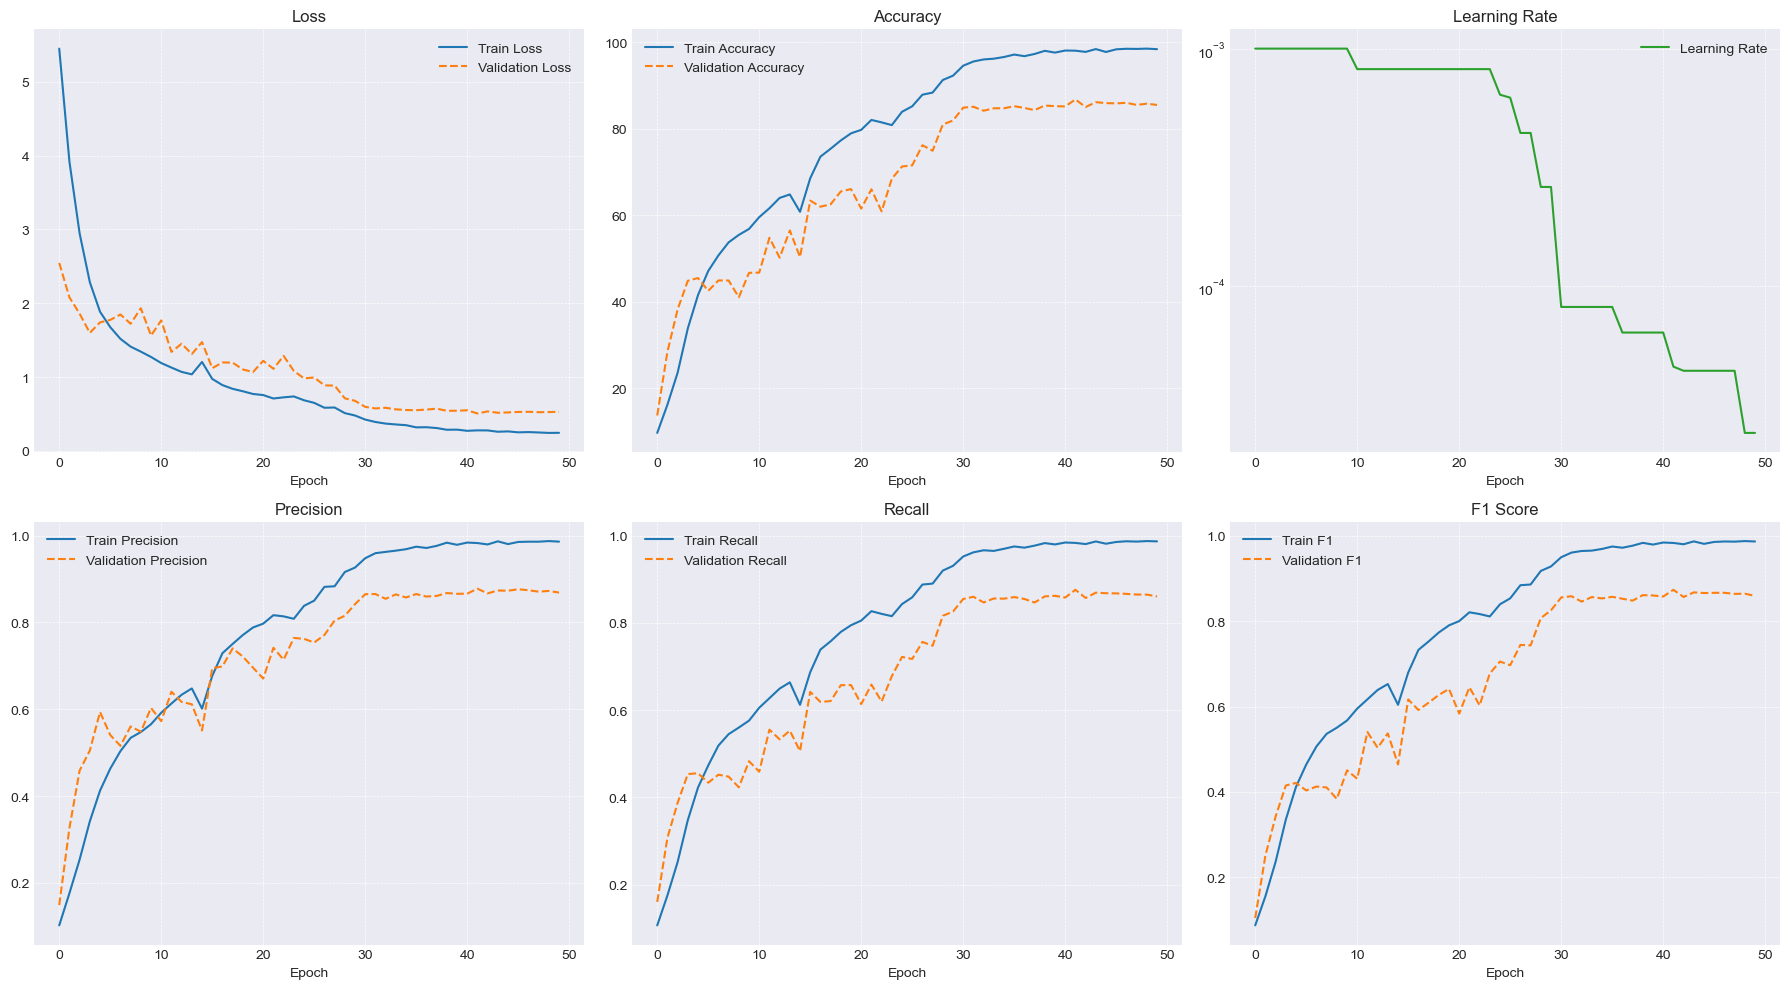

In [22]:
plot_training_curves(compute_average_history(all_metrics), 'AVG')